In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [17]:
dfmay_1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180505.txt')
dfmay_1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [18]:
dfmay_1[['entries_change', 'exits_change']] = dfmay_1.groupby(['UNIT', 'SCP']).diff()
dfmay_1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries_change,exits_change
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,17.0,1.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,16.0,33.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,81.0,92.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,214.0,60.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,20:00:00,REGULAR,6599456,2236074,281.0,59.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2018,00:00:00,REGULAR,6599584,2236102,128.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2018,04:00:00,REGULAR,6599593,2236106,9.0,4.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2018,08:00:00,REGULAR,6599603,2236123,10.0,17.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2018,12:00:00,REGULAR,6599689,2236180,86.0,57.0


In [19]:
### There is one outlier as shown by this and the next cell using the previous logic in differences...
dfmay_1['entries_change'].describe()

count    1.924970e+05
mean    -7.673750e+03
std      2.457035e+06
min     -9.346161e+08
25%      9.000000e+00
50%      7.800000e+01
75%      2.590000e+02
max      4.247180e+05
Name: entries_change, dtype: float64

In [34]:
df = dfmay_1[dfmay_1['entries_change'] < 0]
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries_change,exits_change
1427,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/28/2018,04:00:00,REGULAR,885937065,491512363,-187.0,-28.0
1428,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/28/2018,08:00:00,REGULAR,885936996,491512132,-69.0,-231.0
1429,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/28/2018,12:00:00,REGULAR,885936550,491511488,-446.0,-644.0
1430,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/28/2018,16:00:00,REGULAR,885936043,491510656,-507.0,-832.0
1431,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/28/2018,20:00:00,REGULAR,885935370,491509971,-673.0,-685.0
1432,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/29/2018,00:00:00,REGULAR,885934795,491509690,-575.0,-281.0
1433,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/29/2018,04:00:00,REGULAR,885934626,491509627,-169.0,-63.0
1434,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/29/2018,08:00:00,REGULAR,885934552,491509495,-74.0,-132.0
1435,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/29/2018,12:00:00,REGULAR,885934245,491508881,-307.0,-614.0
1436,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/29/2018,16:00:00,REGULAR,885933782,491508093,-463.0,-788.0


In [27]:
df = dfmay_1[abs(dfmay_1['entries_change']) > 9000]
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries_change,exits_change
23958,C025,R215,00-03-00,86 ST,R,BMT,05/01/2018,16:00:00,REGULAR,245,271,-7117658.0,-8429658.0
32661,H023,R236,00-06-01,DEKALB AV,L,BMT,05/02/2018,16:00:00,REGULAR,655599,9,-729123.0,-36002.0
35307,JFK02,R535,01-00-03,HOWARD BCH JFK,A,IND,05/03/2018,17:00:00,REGULAR,0,0,-71002.0,-163765.0
52080,N071,R013,00-06-00,34 ST-PENN STA,ACE,IND,04/30/2018,20:00:00,REGULAR,524305,34,424718.0,-361559.0
61964,N114,R297,01-00-03,FRANKLIN AV,ACS,IND,04/29/2018,01:00:00,REGULAR,35,36,-94841.0,-60655.0
75467,N305A,R016,00-00-02,LEXINGTON AV/53,EM6,IND,04/30/2018,20:00:00,REGULAR,137,18,-1787567.0,-517791.0
110407,PTH01,R549,00-00-02,NEWARK HW BMEBE,1,PTH,04/30/2018,21:54:41,REGULAR,23,0,-12935.0,-313.0
112098,PTH03,R552,00-01-02,JOURNAL SQUARE,1,PTH,05/04/2018,09:30:05,REGULAR,9,180,-89085.0,-150462.0
114817,PTH07,R550,00-00-04,CITY / BUS,1,PTH,04/30/2018,09:48:43,REGULAR,1127,45,-38296.0,-20696.0
115189,PTH07,R550,00-01-04,CITY / BUS,1,PTH,05/02/2018,13:09:23,REGULAR,29,5,-15972.0,-6052.0


In [28]:
df = dfmay_1[dfmay_1['STATION']=='34 ST-PENN STA']
df[df['entries_change'] < -1]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries_change,exits_change
130487,R138,R293,00-03-06,34 ST-PENN STA,123ACE,IRT,05/04/2018,22:00:00,REGULAR,0,0,-4533810.0,-5613779.0


In [29]:
'''
Creating a dictionary with stations as keys and a sum of entries and exits as values
'''

stations = {}
current_station = ''
sum = 0
for entry in dfmay_1.values:
    if entry[3] != current_station:
        stations[current_station] = sum
        current_station = entry[3]
        sum = 0
    else:
        sum = sum + entry[9] + entry[10]

In [30]:
stations

{'': 0,
 '59 ST': 147260165823,
 '5 AV/59 ST': 10337603539,
 '57 ST-7 AV': 335244982361,
 '49 ST': 13048010788,
 'TIMES SQ-42 ST': 433983410047,
 '34 ST-HERALD SQ': 243214324875,
 '28 ST': 148743976524,
 '23 ST': 241857116674,
 '14 ST-UNION SQ': 17020910560,
 '8 ST-NYU': 6850237418,
 'PRINCE ST': 4535819715,
 'CANAL ST': 1693283718,
 'CITY HALL': 15662893813,
 'CORTLANDT ST': 148454829174,
 'RECTOR ST': 5321333738,
 'WHITEHALL S-FRY': 14461490195,
 'DELANCEY/ESSEX': 3709751017,
 'BOWERY': 1263818154,
 'CHAMBERS ST': 166885195385,
 'FULTON ST': 114737947811,
 'BROAD ST': 1643825616,
 '7 AV': 122247674288,
 'PARK PLACE': 4922486103,
 'BOTANIC GARDEN': 349884341,
 'PROSPECT PARK': 99881012244,
 'PARKSIDE AV': 2985421075,
 'CHURCH AV': 112053875786,
 'BEVERLEY ROAD': 900016576,
 'CORTELYOU RD': 1390746917,
 'NEWKIRK PLAZA': 4520928738,
 'AVENUE H': 5255235988,
 'AVENUE J': 3477375371,
 'AVENUE M': 4916099378,
 'KINGS HWY': 5580215505,
 'AVENUE U': 1516958784,
 'NECK RD': 8268979615,
 'SHEE

In [31]:
stiles = {}
current_stile = ''
sum = 0
for entry in dfmay_1.values:
    if entry[2] != current_stile:
        stiles[current_stile] = sum
        current_stile = entry[2]
        sum = 0
    else:
        sum = sum + entry[9] + entry[10]

In [32]:
stiles

{'': 0,
 '02-00-00': 445582518,
 '02-00-01': 171798955,
 '02-03-00': 80628905,
 '02-03-01': 52377719,
 '02-03-02': 43818764,
 '02-03-03': 34725427,
 '02-03-04': 4750738,
 '02-03-05': 1995209,
 '02-03-06': 9985244,
 '02-05-00': 81678761,
 '02-05-01': 15738363,
 '02-06-00': 408173827,
 '00-00-00': 169118683,
 '00-00-01': 107265176,
 '00-00-02': 73309684,
 '00-00-03': 33698683,
 '00-00-04': 31353330,
 '00-03-00': 22153907,
 '00-03-01': 403217821,
 '00-03-02': 9501697,
 '01-05-00': 32998,
 '01-05-01': 21625,
 '01-06-00': 149628752,
 '01-06-01': 408943168,
 '01-06-02': 306877917,
 '01-06-03': 268006202,
 '00-00-05': 20117611,
 '00-00-06': 80325001,
 '00-00-07': 27081146,
 '01-00-00': 113274064,
 '01-00-01': 3448021547,
 '01-00-02': 133275016,
 '01-00-03': 96133071,
 '01-00-04': 93287386,
 '01-00-05': 33422661,
 '01-03-00': 81688438,
 '01-03-01': 69446588,
 '01-03-02': 9076362,
 '02-00-02': 140340868,
 '02-06-01': 12612614,
 '03-00-00': 280284701,
 '03-00-01': 450319159,
 '03-00-02': 3191934

In [33]:
import operator
'''
Creating x and y arrays for barplotting in seaborn
'''


sorted_stations = sorted(stations.items(), key=operator.itemgetter(1))
hist_stations = sorted_stations[-10:]
x = []
y=[]
for item in hist_stations:
    x.append(item[0])
    y.append(item[1])

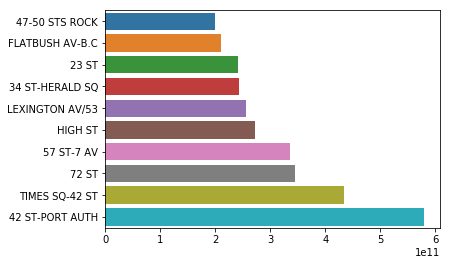

In [77]:
plot = sns.barplot(x= y, y=x, orient ='h')

In [82]:
dfmay_1[dfmay_1['SCP'] == '05-03-01']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Entry Difference,Exit Difference
52315,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/28/2018,00:00:00,REGULAR,1215494967,1367975813,0,0
52316,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/28/2018,04:00:00,REGULAR,1215495026,1367975838,59,25
52317,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/28/2018,08:00:00,REGULAR,1215495123,1367975874,97,36
52318,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/28/2018,12:00:00,REGULAR,1215495406,1367975953,283,79
52319,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/28/2018,16:00:00,REGULAR,1215495769,1367976084,363,131
52320,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/28/2018,20:00:00,REGULAR,1215496163,1367976279,394,195
52321,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/29/2018,00:00:00,REGULAR,1215496430,1367976405,267,126
52322,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/29/2018,04:00:00,REGULAR,1215496481,1367976439,51,34
52323,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/29/2018,08:00:00,REGULAR,1215496556,1367976458,75,19
52324,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/29/2018,12:00:00,REGULAR,1215496824,1367976503,268,45
